In [3]:
import json
import spacy
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
# Load the datas and extract some important information

label_values = np.zeros(6)
text_lenghts = []

with open("emotion_dataset.txt", "r") as datafile:
    for line in datafile:
        json_line = json.loads(line.strip())

        # Assert every label associated to a tweet belongs to the expected interval
        assert(0 <= json_line["label"] and json_line["label"] <= 5)

        label_values[json_line["label"]] += 1
        text_lenghts.append(len(json_line["text"]))

print(label_values)
print(text_lenghts)

[1443. 1703.  401.  671.  584.  198.]
[23, 108, 48, 92, 20, 65, 122, 73, 98, 19, 66, 108, 58, 34, 219, 47, 36, 39, 125, 80, 78, 213, 47, 129, 87, 259, 86, 38, 107, 51, 67, 52, 112, 176, 257, 57, 43, 127, 140, 115, 143, 127, 127, 91, 141, 70, 289, 93, 25, 44, 54, 56, 26, 104, 175, 69, 213, 93, 152, 87, 103, 117, 133, 127, 58, 202, 66, 109, 147, 75, 64, 113, 125, 62, 97, 160, 189, 65, 100, 24, 40, 102, 110, 53, 60, 146, 99, 77, 68, 87, 82, 83, 161, 82, 137, 56, 86, 78, 110, 197, 164, 36, 86, 103, 200, 111, 241, 168, 43, 178, 160, 23, 126, 236, 60, 28, 55, 175, 92, 81, 93, 73, 122, 108, 250, 53, 71, 49, 198, 125, 134, 161, 26, 186, 145, 199, 50, 109, 143, 119, 84, 73, 78, 36, 126, 63, 95, 81, 56, 208, 92, 99, 81, 250, 200, 72, 185, 83, 111, 183, 59, 183, 262, 141, 26, 87, 69, 69, 61, 107, 147, 50, 76, 78, 77, 129, 84, 136, 136, 83, 86, 110, 44, 27, 80, 114, 130, 32, 136, 44, 20, 76, 65, 182, 97, 65, 83, 106, 134, 140, 80, 43, 150, 58, 91, 213, 82, 126, 76, 86, 56, 265, 131, 75, 82, 50, 19

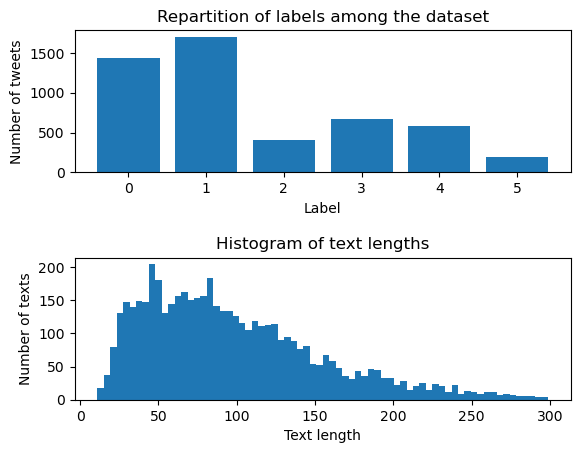

In [6]:
plt.figure()

plt.subplot(2,1,1)
plt.bar([i for i in range(len(label_values))], label_values)
plt.xlabel("Label")
plt.ylabel("Number of tweets")
plt.title("Repartition of labels among the dataset")

plt.subplot(2,1,2)
plt.hist(text_lenghts, bins=70)
plt.xlabel("Text length")
plt.ylabel("Number of texts")
plt.title("Histogram of text lengths")

plt.subplots_adjust(hspace=0.6)

plt.show()

In [2]:
# Charger le modèle linguistique de spaCy
nlp = spacy.load("en_core_web_sm")

# Chemin vers le fichier
file_path = "emotion_dataset.txt"

# Lecture et lemmatisation
lemmatized_data = []

with open(file_path, "r", encoding="utf-8") as file:
    i=0
    for line in file:
        if i < 5:
            # Charger chaque ligne comme un objet JSON
            record = json.loads(line.strip())
            
            # Analyse de la phrase avec spaCy
            doc = nlp(record["text"])
            
            # Lemmatisation de chaque mot
            lemmatized_text = " ".join([token.lemma_ for token in doc])
            
            # Ajouter la phrase lemmatisée au résultat
            record["lemmatized_text"] = lemmatized_text
            lemmatized_data.append(record)

            i+=1
        else:
            break

# Afficher les données avec lemmatisation
for entry in lemmatized_data:
    print(f"Original: {entry['text']}, Lemmatized: {entry['lemmatized_text']}, Label: {entry['label']}")


Original: i didnt feel humiliated, Lemmatized: I do not feel humiliated, Label: 0
Original: i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake, Lemmatized: I can go from feel so hopeless to so damned hopeful just from be around someone who care and be awake, Label: 0
Original: im grabbing a minute to post i feel greedy wrong, Lemmatized: I m grab a minute to post I feel greedy wrong, Label: 3
Original: i am ever feeling nostalgic about the fireplace i will know that it is still on the property, Lemmatized: I be ever feel nostalgic about the fireplace I will know that it be still on the property, Label: 2
Original: i am feeling grouchy, Lemmatized: I be feel grouchy, Label: 3
